### Dataset: Cats and dogs
### Algoritm: RandomizedSearchCV

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray

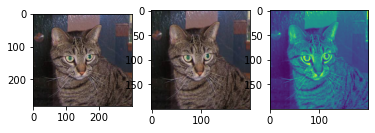

In [9]:
cat1 = io.imread("cat.1.jpg")
cat1_ = resize(cat1, (200,200,3))
cat1_gray = rgb2gray(cat1_)
fig = plt.figure()
columns = 3; rows = 1
fig.add_subplot(rows, columns, 1);plt.imshow(cat1)
fig.add_subplot(rows, columns, 2);plt.imshow(cat1_)
fig.add_subplot(rows, columns, 3);plt.imshow(cat1_gray)
plt.show()


In [10]:
x_train = []; y_train = []
for i in range(1,2001):
    cat = rgb2gray(resize(io.imread('training_set\cats\cat.{}.jpg'.format(i)), (200,200)))#rendre les images d'entrainement en niveau de gris après recadrage
    x_train.append(cat); y_train.append(0) #0-->'cat'
    
for i in range(1,2001):
    dog = rgb2gray(resize(io.imread('training_set\dogs\dog.{}.jpg'.format(i)), (200,200)))
    x_train.append(dog); y_train.append(1) #1-->'dog'
    
x_train, y_train = np.asarray(x_train), np.asarray(y_train)
print('x_train shape: ',x_train.shape, 'y_train shape: ', y_train.shape)

x_train shape:  (4000, 200, 200) y_train shape:  (4000,)


In [11]:
x_test = []; y_test = []
for i in range(4001,5001):
    cat = rgb2gray(resize(io.imread('test_set\cats\cat.{}.jpg'.format(i)), (200,200)))#rendre les images de test en niveau de gris après recadrage
    x_test.append(cat); y_test.append(0) #0-->'cat'
    
for i in range(4001,5001):
    dog = rgb2gray(resize(io.imread('test_set\dogs\dog.{}.jpg'.format(i)), (200,200)))
    x_test.append(dog); y_test.append(1) #1-->'dog'
    
x_test, y_test = np.asarray(x_test), np.asarray(y_test)
print('x_test shape: ',x_test.shape, 'y_test shape: ', y_test.shape)

x_test shape:  (2000, 200, 200) y_test shape:  (2000,)


In [12]:
def predict(X, k):
    distances = []
    for i in range(0, len(x_train)):
        distances += [np.sum(np.abs(x_train[i] - X))]
    min_indexs = np.argsort(distances)[:k]#récupérer les indices des valeurs triés dans l'ordre croisant 
    y_ = y_train[min_indexs]; counts = np.bincount(y_)#compter les occurances de la valeur '0' et '1'
    if np.argmax(counts)==0:return('cat')#argmax(count) pour compter la valeur qui se répète le plus (0 ou 1)
    else:return('dog')

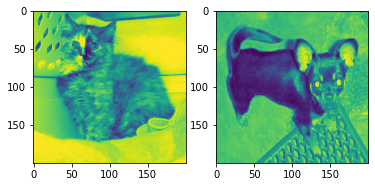

['cat', 'dog']


In [13]:
#Exemple de prediction en utilisant la fonction 'predict'
numeros_images_a_predire = [4,1089]
fig=plt.figure(); predictions=[]
columns=2;rows=1;i=1
for num in numeros_images_a_predire:
    predictions+=[predict(x_test[num],3)]
    fig.add_subplot(rows, columns, i); plt.imshow(x_test[num]); i+=1
plt.show()
print(predictions)

### Le modèle basé sur KNN pour classifier les cats and dog  

In [29]:
from sklearn.model_selection import RandomizedSearchCV
import time

distances=['euclidean','cityblock'];valeurs_de_k=np.arange(1, 31, 2) #cityblock(également appelé distance de Manhattan)
parametres_grid={"n_neighbors":valeurs_de_k, 'metric' :distances}

grid=RandomizedSearchCV(neigh, parametres_grid)
start = time.time()
grid.fit(x_train,y_train)
print("randomized search took {:.2f} minutes".format((time.time() - start)/60))#calculer le temps écoulé (en minutes)
acc = grid.score(x_test, y_test)
print("randomized search accuracy: {:.2f}%".format(acc * 100))#calculer la précison en utilisant les paramètres optimaux
print("randomized search best parameters: {}".format(grid.best_params_))#les paramètres optimaux

randomized search took 17.45 minutes
randomized search accuracy: 58.05%
randomized search best parameters: {'n_neighbors': 15, 'metric': 'cityblock'}
